Link docs rascunho: https://docs.google.com/document/d/1h2LcoJ6kcWJHxca8iFtHK-m5nJvip0abbazqTLu7yLU

Sheets com dicionário de colunas: https://docs.google.com/spreadsheets/d/1u1B4HHANrZ1jwTfmOgenltDBv1v2JVb3VlG4u2Idzbw

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#A principio usará essas duas bases apenas

df_empreend = pd.read_csv('../dados/simu-carteira-mun-T.csv')
df_acidentes = pd.read_csv('../dados/acidentes_de_transportes.csv')

#adicional para verificar:
df_feridos = pd.read_csv('../dados/simu-feridos-mun-T.csv')
df_mortes = pd.read_csv('../dados/simu-mortes-mun-T.csv')
df_pemob = pd.read_csv('../dados/simu-pemob-mun_T.csv') #Pesquisa Nacional de Mobilidade Urbana - PEMOB
df_acesso_sistema = pd.read_csv("../dados/simu.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-110-75046db005df>:17: DtypeWarning: Columns (9,42,61,75,77,78,79,86,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  df_empreend = pd.read_csv(path+'simu-carteira-mun-T.csv')


# Amostra bases

In [ ]:
print('Tamanho: ',df_empreend.shape)
df_empreend.head()

Tamanho:  (71248, 91)


,cod_mdr,cod_operacao,cod_saci,cod_convenio_siafi,cod_ag_operador,origem,dsc_concedente,dsc_fonte,dsc_unidade,cod_proposta,...,mun_LATITUDE,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_NOME_UF,Região,uf_REGIAO,Município,mun_coordenadas
0,1-38001,319910.0,38001.0,0.0,375658.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO,NE,Nordeste,Recife,"-8.054,-34.881"
1,1-38002,319912.0,38002.0,0.0,375664.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO,NE,Nordeste,Recife,"-8.054,-34.881"
2,1-38003,319914.0,38003.0,0.0,375666.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO,NE,Nordeste,Recife,"-8.054,-34.881"
3,1-38004,354485.0,38004.0,0.0,NaN,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1-38005,345051.0,38005.0,0.0,377438.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SE,Sudeste,NaN,NaN


In [ ]:
print('Tamanho: ',df_acidentes.shape)
df_acidentes.head()


Tamanho:  (55700, 56)


,Código IBGE,ano,Região,Município,Pedestre_mortes,Ciclista_mortes,Motociclista_mortes,Ocup_triciclo_motor_mortes,Ocup_automovel_mortes,Ocup_caminhonete_mortes,...,Outros_feridos,total_feridos,taxa_mun_feridos,taxa_mun_pedestre_feridos,taxa_mun_ciclista_feridos,taxa_mun_motociclista_feridos,taxa_mun_automovel_feridos,taxa_mun_veiculo_pesado_feridos,taxa_mun_onibus_feridos,taxa_mun_outros_feridos
0,1100015,2010,N,Alta Floresta D'Oeste,2,0,5,0,0,0,...,0,13.0,53.2962,0.0000,0.0000,53.2962,0.0000,0.0,0.0,0.0000
1,1100023,2010,N,Ariquemes,0,1,2,0,0,0,...,3,43.0,47.5911,0.0000,1.1068,40.9505,2.2135,0.0,0.0,3.3203
2,1100031,2010,N,Cabixi,0,0,0,0,0,0,...,0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000
3,1100049,2010,N,Cacoal,2,1,17,0,4,0,...,1,57.0,72.5431,63.6343,1.2727,6.3634,0.0000,0.0,0.0,1.2727
4,1100056,2010,N,Cerejeiras,3,0,1,0,0,0,...,0,1.0,5.8723,0.0000,5.8723,0.0000,0.0000,0.0,0.0,0.0000


In [ ]:
df_empreend.columns

Index(['cod_mdr', 'cod_operacao', 'cod_saci', 'cod_convenio_siafi',
       'cod_ag_operador', 'origem', 'dsc_concedente', 'dsc_fonte',
       'dsc_unidade', 'cod_proposta', 'dsc_situacao_contrato_mdr',
       'bln_carteira_mdr', 'bln_carteira_mdr_ativo', 'dsc_situacao_objeto_mdr',
       'dsc_paralisada_mdr', 'bln_ativo', 'bln_ativo_boolean', 'cod_id_fonte',
       'cod_id_pac', 'programa', 'acao', 'uf_SIGLA_UF', 'mun_MUNNOMEX',
       'Código IBGE', 'empreendimento', 'vlr_repasse_financiamento',
       'vlr_contrapartida', 'vlr_empenhado', 'vlr_desembolsado',
       'vlr_desbloqueado', 'vlr_desembolsado_19', 'vlr_desembolsado_20',
       'vlr_desembolsado_21', 'situacao_obra', 'situacao_obra_base_validacao',
       'situacao_contrato', 'prc_fisico', 'dte_assinatura', 'dte_inicio_obra',
       'dte_fim_obra', 'dte_ult_desembolso', 'dte_ult_desbloqueio',
       'dte_ult_ref_bm', 'vlr_ult_desembolso', 'vlr_ult_repasse_desbloqueado',
       'vlr_ult_contrapartida_desbloqueado', 'agente_fi

In [ ]:
df_acidentes.columns

Index(['Código IBGE', 'ano', 'Região', 'Município', 'Pedestre_mortes',
       'Ciclista_mortes', 'Motociclista_mortes', 'Ocup_triciclo_motor_mortes',
       'Ocup_automovel_mortes', 'Ocup_caminhonete_mortes',
       'Ocup_veic_transp_pesado_mortes', 'Ocup_onibus_mortes', 'Outros_mortes',
       'Populacao', 'total_mortes', 'taxa_mun_mortes',
       'taxa_mun_pedestre_mortes', 'taxa_mun_ciclista_mortes',
       'taxa_mun_motociclista_mortes', 'taxa_mun_automovel_mortes',
       'taxa_mun_veiculo_pesado_mortes', 'taxa_mun_onibus_mortes',
       'taxa_mun_outros_mortes', 'mun_MUNNOME', 'mun_MUNNOMEX', 'mun_AMAZONIA',
       'mun_FRONTEIRA', 'mun_CAPITAL', 'mun_LATITUDE', 'mun_LONGITUDE',
       'mun_ALTITUDE', 'mun_AREA', 'mun_codigo_adotado', 'uf_SIGLA_UF',
       'uf_CODIGO_UF', 'uf_NOME_UF', 'uf_REGIAO', 'mun_coordenadas',
       'Pedestre_feridos', 'Ciclista_feridos', 'Motociclista_feridos',
       'Ocup_triciclo_motor_feridos', 'Ocup_automovel_feridos',
       'Ocup_caminhonete_ferid

## Bases adicionais

In [ ]:
print('Tamanho: ',df_feridos.shape)
df_feridos.head()

Tamanho:  (55700, 39)


,Código IBGE,ano,Região,UF,Município,Pedestre,Ciclista,Motociclista,Ocup triciclo motor,Ocup automovel,...,mun_LATITUDE,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_SIGLA_UF,uf_CODIGO_UF,uf_NOME_UF,uf_REGIAO,mun_coordenadas
0,1100015,2010,N,RO,Alta Floresta D'Oeste,0,0,13,0,0,...,-11.929,-61.996,350.0,7066.702,110001,RO,11,RONDONIA,Norte,"-11.92900,-61.99600"
1,1100023,2010,N,RO,Ariquemes,0,1,37,0,1,...,-9.913,-63.041,142.0,4426.558,110002,RO,11,RONDONIA,Norte,"-9.91300,-63.04100"
2,1100031,2010,N,RO,Cabixi,0,0,0,0,0,...,-13.492,-60.545,230.0,1314.355,110003,RO,11,RONDONIA,Norte,"-13.49200,-60.54500"
3,1100049,2010,N,RO,Cacoal,50,1,5,0,0,...,-11.438,-61.448,200.0,3792.638,110004,RO,11,RONDONIA,Norte,"-11.43800,-61.44800"
4,1100056,2010,N,RO,Cerejeiras,0,1,0,0,0,...,-13.189,-60.812,277.0,2783.305,110005,RO,11,RONDONIA,Norte,"-13.18900,-60.81200"


In [ ]:
print('Tamanho: ',df_mortes.shape)
df_mortes.head()

Tamanho:  (55700, 39)


,Código IBGE,ano,Região,UF,Município,Pedestre,Ciclista,Motociclista,Ocup triciclo motor,Ocup automovel,...,mun_LATITUDE,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_SIGLA_UF,uf_CODIGO_UF,uf_NOME_UF,uf_REGIAO,mun_coordenadas
0,1100015,2010,N,RO,Alta Floresta D'Oeste,2,0,5,0,0,...,-11.929,-61.996,350.0,7066.702,110001,RO,11,RONDONIA,Norte,"-11.92900,-61.99600"
1,1100023,2010,N,RO,Ariquemes,0,1,2,0,0,...,-9.913,-63.041,142.0,4426.558,110002,RO,11,RONDONIA,Norte,"-9.91300,-63.04100"
2,1100031,2010,N,RO,Cabixi,0,0,0,0,0,...,-13.492,-60.545,230.0,1314.355,110003,RO,11,RONDONIA,Norte,"-13.49200,-60.54500"
3,1100049,2010,N,RO,Cacoal,2,1,17,0,4,...,-11.438,-61.448,200.0,3792.638,110004,RO,11,RONDONIA,Norte,"-11.43800,-61.44800"
4,1100056,2010,N,RO,Cerejeiras,3,0,1,0,0,...,-13.189,-60.812,277.0,2783.305,110005,RO,11,RONDONIA,Norte,"-13.18900,-60.81200"


In [ ]:
print('Tamanho: ',df_pemob.shape)
df_pemob.head()

Tamanho:  (27850, 62)


,Código IBGE,Município,ano,pontos_emb_desemb,tarifa_pemob,arrec_pedagio,arrec_estacionamento,arrec_multas,arrec_trpi,arrec_multas_utilizacao,...,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_SIGLA_UF,uf_CODIGO_UF,uf_NOME_UF,Região,uf_REGIAO,mun_coordenadas
0,1100015,Alta Floresta D'Oeste,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-61.996,350,7066702,110001,RO,11,RONDONIA,N,Norte,"-11.929,-61.996"
1,1100023,Ariquemes,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-63.041,142,4426558,110002,RO,11,RONDONIA,N,Norte,"-9.913,-63.041"
2,1100031,Cabixi,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-60.545,230,1314355,110003,RO,11,RONDONIA,N,Norte,"-13.492,-60.545"
3,1100049,Cacoal,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-61.448,200,3792638,110004,RO,11,RONDONIA,N,Norte,"-11.438,-61.448"
4,1100056,Cerejeiras,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-60.812,277,2783305,110005,RO,11,RONDONIA,N,Norte,"-13.189,-60.812"


In [ ]:
print('Tamanho: ',df_acesso_sistema.shape)
df_acesso_sistema.head()

Tamanho:  (50130, 80)


,Código IBGE,Populacao,ano,mun_MUNNOME,mun_MUNNOMEX,mun_AMAZONIA,mun_FRONTEIRA,mun_CAPITAL,uf_CODIGO_UF,mun_LATITUDE,...,divmodal_perc_outros,custo_operacao,custo_administrativo,custo_combustivel,custo_veiculos,custo_remuneracao_servico,custo_pecas,custo_impostos,custo_despesas_adm,custo_outros
0,1100015,24392.0,2010,Alta Floresta D'Oeste,ALTA FLORESTA D'OESTE,S,S,N,11,-11.929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1100015,24228.0,2011,Alta Floresta D'Oeste,ALTA FLORESTA D'OESTE,S,S,N,11,-11.929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1100015,24069.0,2012,Alta Floresta D'Oeste,ALTA FLORESTA D'OESTE,S,S,N,11,-11.929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1100015,25728.0,2013,Alta Floresta D'Oeste,ALTA FLORESTA D'OESTE,S,S,N,11,-11.929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1100015,25652.0,2014,Alta Floresta D'Oeste,ALTA FLORESTA D'OESTE,S,S,N,11,-11.929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_mortes.columns

Index(['Código IBGE', 'ano', 'Região', 'UF', 'Município', 'Pedestre',
       'Ciclista', 'Motociclista', 'Ocup triciclo motor', 'Ocup automovel',
       'Ocup caminhonete', 'Ocup veic transp pesado', 'Ocup onibus', 'Outros',
       'Populacao', 'total_mortes', 'taxa_mun', 'taxa_mun_pedestre',
       'taxa_mun_ciclista', 'taxa_mun_motociclista', 'taxa_mun_automovel',
       'taxa_mun_veiculo_pesado', 'taxa_mun_onibus', 'taxa_mun_outros',
       'mun_MUNNOME', 'mun_MUNNOMEX', 'mun_AMAZONIA', 'mun_FRONTEIRA',
       'mun_CAPITAL', 'mun_LATITUDE', 'mun_LONGITUDE', 'mun_ALTITUDE',
       'mun_AREA', 'mun_codigo_adotado', 'uf_SIGLA_UF', 'uf_CODIGO_UF',
       'uf_NOME_UF', 'uf_REGIAO', 'mun_coordenadas'],
      dtype='object')

In [ ]:
df_feridos.columns

Index(['Código IBGE', 'ano', 'Região', 'UF', 'Município', 'Pedestre',
       'Ciclista', 'Motociclista', 'Ocup triciclo motor', 'Ocup automovel',
       'Ocup caminhonete', 'Ocup veic transp pesado', 'Ocup onibus', 'Outros',
       'Populacao', 'total_feridos', 'taxa_mun', 'taxa_mun_pedestre',
       'taxa_mun_ciclista', 'taxa_mun_motociclista', 'taxa_mun_automovel',
       'taxa_mun_veiculo_pesado', 'taxa_mun_onibus', 'taxa_mun_outros',
       'mun_MUNNOME', 'mun_MUNNOMEX', 'mun_AMAZONIA', 'mun_FRONTEIRA',
       'mun_CAPITAL', 'mun_LATITUDE', 'mun_LONGITUDE', 'mun_ALTITUDE',
       'mun_AREA', 'mun_codigo_adotado', 'uf_SIGLA_UF', 'uf_CODIGO_UF',
       'uf_NOME_UF', 'uf_REGIAO', 'mun_coordenadas'],
      dtype='object')

In [ ]:
# prompt: faça merge de df_simu com df_empreend usando como chave a coluna "Município"

df_merged = pd.merge(left=df_acidentes, right=df_empreend, on='Município', how='inner')
df_merged


,Código IBGE_x,ano_x,Região_x,Município,Pedestre_mortes,Ciclista_mortes,Motociclista_mortes,Ocup_triciclo_motor_mortes,Ocup_automovel_mortes,Ocup_caminhonete_mortes,...,uf_CODIGO_UF_y,mun_LATITUDE_y,mun_LONGITUDE_y,mun_ALTITUDE_y,mun_AREA_y,mun_codigo_adotado_y,uf_NOME_UF_y,Região_y,uf_REGIAO_y,mun_coordenadas_y
0,1100015,2010,N,Alta Floresta D'Oeste,2,0,5,0,0,0,...,11.0,-11.929,-61.996,350.0,7066702.0,110001.0,RONDONIA,N,Norte,"-11.929,-61.996"
1,1100015,2010,N,Alta Floresta D'Oeste,2,0,5,0,0,0,...,11.0,-11.929,-61.996,350.0,7066702.0,110001.0,RONDONIA,N,Norte,"-11.929,-61.996"
2,1100015,2011,N,Alta Floresta D'Oeste,0,0,0,0,0,0,...,11.0,-11.929,-61.996,350.0,7066702.0,110001.0,RONDONIA,N,Norte,"-11.929,-61.996"
3,1100015,2011,N,Alta Floresta D'Oeste,0,0,0,0,0,0,...,11.0,-11.929,-61.996,350.0,7066702.0,110001.0,RONDONIA,N,Norte,"-11.929,-61.996"
4,1100015,2012,N,Alta Floresta D'Oeste,1,0,5,0,0,0,...,11.0,-11.929,-61.996,350.0,7066702.0,110001.0,RONDONIA,N,Norte,"-11.929,-61.996"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336136,5000609,2019,CO,Amambaí,2,1,3,0,2,0,...,50.0,-23.104,-55.226,480.0,4202298.0,500060.0,MATO GROSSO DO SUL,CO,Centro-Oeste,"-23.104,-55.226000000000006"
336137,5000609,2019,CO,Amambaí,2,1,3,0,2,0,...,50.0,-23.104,-55.226,480.0,4202298.0,500060.0,MATO GROSSO DO SUL,CO,Centro-Oeste,"-23.104,-55.226000000000006"
336138,5220157,2019,CO,São Luíz do Norte,0,0,2,0,1,0,...,52.0,-14.863,-49.329,564.0,586060.0,522015.0,GOIAS,CO,Centro-Oeste,"-14.863,-49.32899999999999"
336139,5220157,2019,CO,São Luíz do Norte,0,0,2,0,1,0,...,52.0,-14.863,-49.329,564.0,586060.0,522015.0,GOIAS,CO,Centro-Oeste,"-14.863,-49.32899999999999"


# Algumas análises soltas

## Init

#### Anos comportados em cada base

In [ ]:
print('anos da base acidentes: ',df_acidentes['ano'].unique())
print('\nanos da base empreend: ',df_empreend['ano'].sort_values().dropna().unique())

anos da base acidentes:  [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]

anos da base empreend:  [1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007.
 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.
 2020. 2021. 2022. 2023.]


#### Olhando apenas Municípios (Pode gerar problemas para municipios com os mesmos nomes)

In [ ]:
print('Municípios base acidentes: ',df_acidentes["Município"].nunique())
print('Municípios base carteira de empreendimentos: ',df_empreend["Município"].nunique())
municipios_comum = list(set(df_acidentes["Município"]).intersection(set(df_empreend["Município"])))
print('Municípios em comum: ', len(municipios_comum))

Municípios base acidentes:  5320
Municípios base carteira de empreendimentos:  4910
Municípios em comum:  4910


#### Interseção de UF E Município a fim de separar municipios com mesmo nome em UFs diferentes

In [ ]:
print('municipios base acidentes não misturando repetidos: ', df_acidentes[['uf_NOME_UF', 'Município']].drop_duplicates().shape[0])
df_UF_munic_merged = df_acidentes[['uf_NOME_UF', 'Município']].merge(df_empreend[['uf_NOME_UF', 'Município']], how='inner').drop_duplicates().dropna().reset_index(drop=True)
df_UF_munic_merged

municipios base acidentes não misturando repetidos:  5593


,uf_NOME_UF,Município
0,RONDONIA,Alta Floresta D'Oeste
1,RONDONIA,Ariquemes
2,RONDONIA,Cabixi
3,RONDONIA,Cacoal
4,RONDONIA,Cerejeiras
...,...,...
5149,RIO GRANDE DO SUL,Maçambara
5150,RIO GRANDE DO SUL,Restinga Seca
5151,RIO GRANDE DO SUL,Vespasiano Correa
5152,MATO GROSSO DO SUL,Amambaí


#### Municípios de nomes iguais

In [ ]:
df_UF_munic_merged[df_UF_munic_merged.duplicated('Município', keep=False)].sort_values('Município').reset_index()


,index,uf_NOME_UF,Município
0,1309,PERNAMBUCO,Alagoinha
1,1112,PARAIBA,Alagoinha
2,4245,RIO GRANDE DO SUL,Alto Alegre
3,2960,SAO PAULO,Alto Alegre
4,113,RORAIMA,Alto Alegre
...,...,...,...
452,2026,MINAS GERAIS,Água Boa
453,4785,MATO GROSSO,Água Boa
454,565,PIAUI,Água Branca
455,1473,ALAGOAS,Água Branca


## Base acidentes

#### Verifica soma de mortos

In [ ]:
df_mortos = df_acidentes[['Código IBGE','ano','Município','Pedestre_mortes','Ciclista_mortes', 'Motociclista_mortes', 'Ocup_triciclo_motor_mortes',
       'Ocup_automovel_mortes', 'Ocup_caminhonete_mortes','Ocup_veic_transp_pesado_mortes', 'Ocup_onibus_mortes', 'Outros_mortes','Populacao', 'total_mortes']]
df_mortos['soma mortos'] = df_mortos[['Pedestre_mortes','Ciclista_mortes', 'Motociclista_mortes', 'Ocup_triciclo_motor_mortes',
       'Ocup_automovel_mortes', 'Ocup_caminhonete_mortes','Ocup_veic_transp_pesado_mortes', 'Ocup_onibus_mortes', 'Outros_mortes']].sum(axis=1)
display(df_mortos[['soma mortos', 'total_mortes', *df_mortos.columns]].head())
print('\nsoma calculada = soma fornecida',(df_mortos['soma mortos'] == df_mortos['total_mortes']).all())

<ipython-input-19-2dc14d2c1270>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mortos['soma mortos'] = df_mortos[['Pedestre_mortes','Ciclista_mortes', 'Motociclista_mortes', 'Ocup_triciclo_motor_mortes',


,soma mortos,total_mortes,Código IBGE,ano,Município,Pedestre_mortes,Ciclista_mortes,Motociclista_mortes,Ocup_triciclo_motor_mortes,Ocup_automovel_mortes,Ocup_caminhonete_mortes,Ocup_veic_transp_pesado_mortes,Ocup_onibus_mortes,Outros_mortes,Populacao,total_mortes,soma mortos
0,7,7.0,1100015,2010,Alta Floresta D'Oeste,2,0,5,0,0,0,0,0,0,24392,7.0,7
1,33,33.0,1100023,2010,Ariquemes,0,1,2,0,0,0,0,1,29,90353,33.0,33
2,0,0.0,1100031,2010,Cabixi,0,0,0,0,0,0,0,0,0,6313,0.0,0
3,26,26.0,1100049,2010,Cacoal,2,1,17,0,4,0,0,0,2,78574,26.0,26
4,4,4.0,1100056,2010,Cerejeiras,3,0,1,0,0,0,0,0,0,17029,4.0,4



soma calculada = soma fornecida True


### Mortos e feridos por ano

,ano,total_mortes,total_feridos
0,2010,42840.0,146066.0
1,2011,43255.0,153632.0
2,2012,44799.0,159216.0
3,2013,42252.0,170805.0
4,2014,43773.0,176007.0
5,2015,38650.0,174833.0
6,2016,34850.0,180443.0
7,2017,34328.0,181134.0
8,2018,34328.0,183450.0
9,2019,31939.0,183296.0


<Axes: xlabel='ano'>

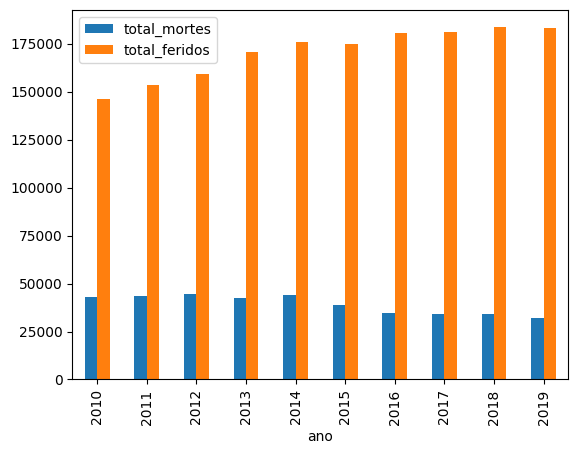

In [ ]:
df_mortes_feridos_ano = df_acidentes[['ano','total_mortes', 'total_feridos']].groupby(by=['ano']).sum().reset_index()
display(df_mortes_feridos_ano)
df_mortes_feridos_ano.plot.bar(x='ano', y=['total_mortes', 'total_feridos'])


### Mortos por Tipos de acidentes

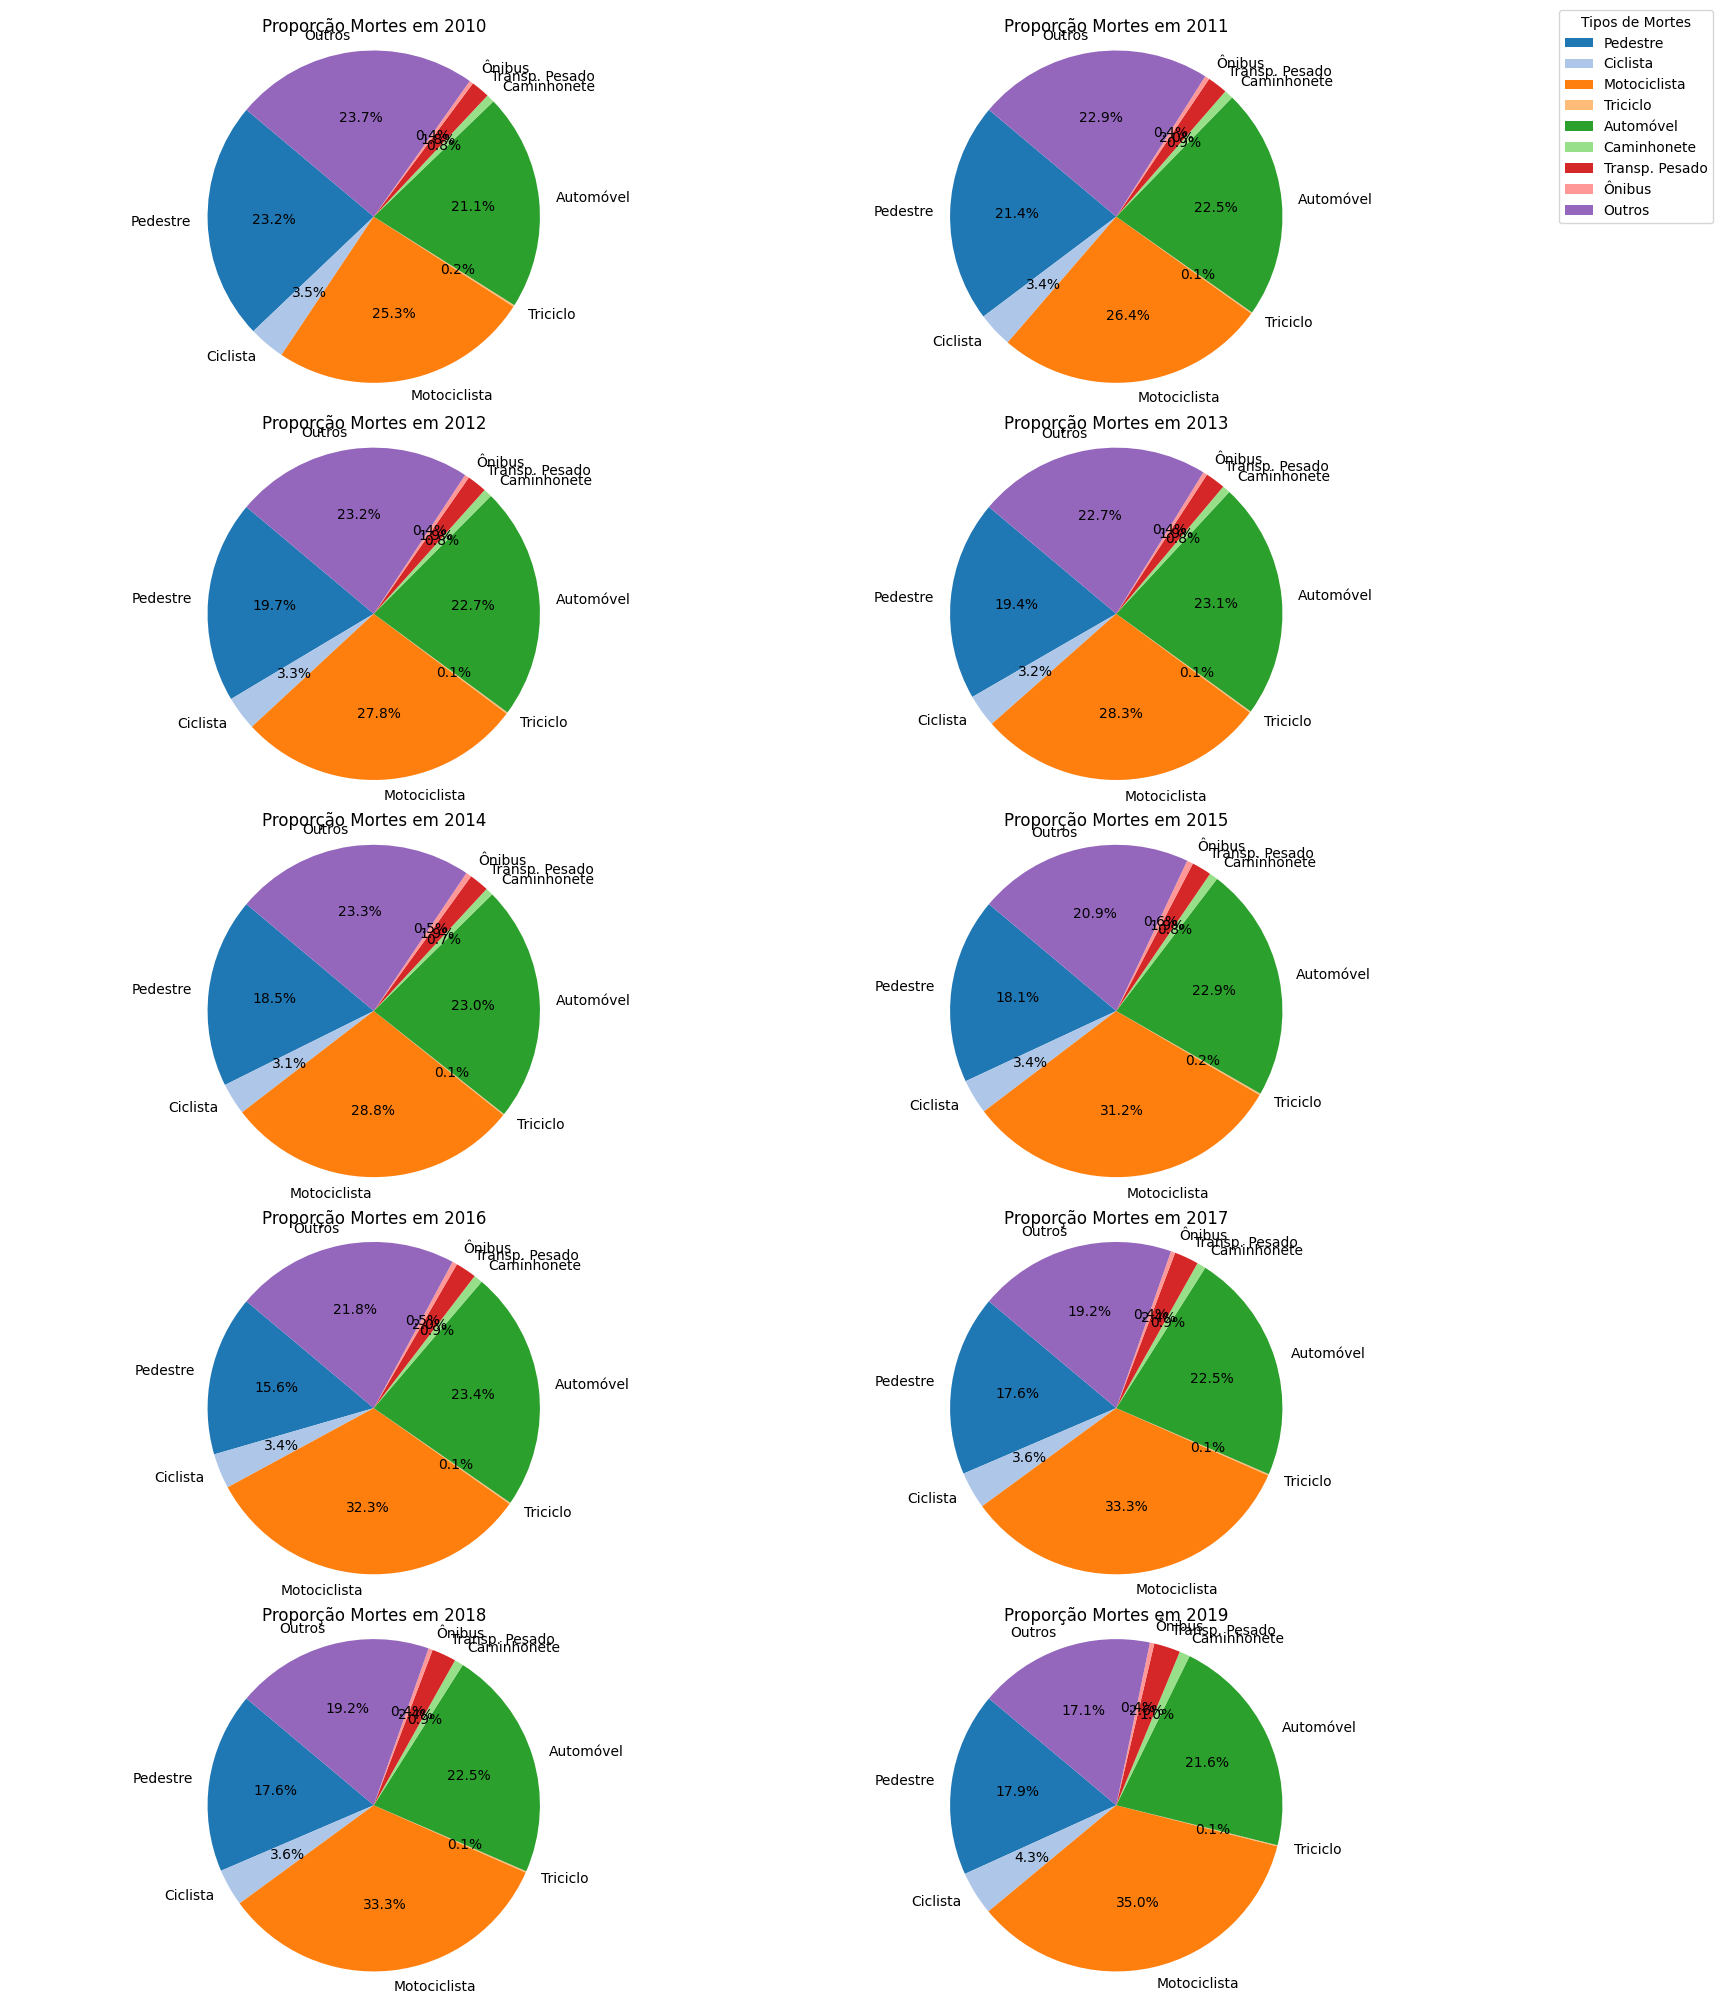

In [ ]:
mortes_tipo_abreviadas = {
    'Pedestre_mortes': 'Pedestre',
    'Ciclista_mortes': 'Ciclista',
    'Motociclista_mortes': 'Motociclista',
    'Ocup_triciclo_motor_mortes': 'Triciclo',
    'Ocup_automovel_mortes': 'Automóvel',
    'Ocup_caminhonete_mortes': 'Caminhonete',
    'Ocup_veic_transp_pesado_mortes': 'Transp. Pesado',
    'Ocup_onibus_mortes': 'Ônibus',
    'Outros_mortes': 'Outros'
}
# Criando um grid de gráficos
fig, axs = plt.subplots(nrows=len(df_acidentes['ano'].unique())//2 + len(df_acidentes['ano'].unique())%2, ncols=2, figsize=(15, 20))
axs = axs.flatten()

for i, ano in enumerate(df_acidentes['ano'].unique()):
    somas_mortes = df_acidentes[df_acidentes['ano'] == ano][['Pedestre_mortes','Ciclista_mortes', 'Motociclista_mortes', 'Ocup_triciclo_motor_mortes','Ocup_automovel_mortes', 'Ocup_caminhonete_mortes',
                    'Ocup_veic_transp_pesado_mortes', 'Ocup_onibus_mortes', 'Outros_mortes',]].sum()

    labels_abreviados = [mortes_tipo_abreviadas[col] for col in somas_mortes.index]


    axs[i].pie(somas_mortes, labels=labels_abreviados, colors=plt.get_cmap('tab20').colors, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Proporção Mortes em {ano}')
    axs[i].axis('equal')  # Assegura que o gráfico de pizza seja desenhado como um círculo

fig.legend(labels_abreviados, loc='upper right', bbox_to_anchor=(1.15, 1), title="Tipos de Mortes")

# Removendo gráficos vazios (caso o número de anos seja ímpar)
if len(df_acidentes['ano'].unique()) % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


### Mortos por Tipos de acidentes

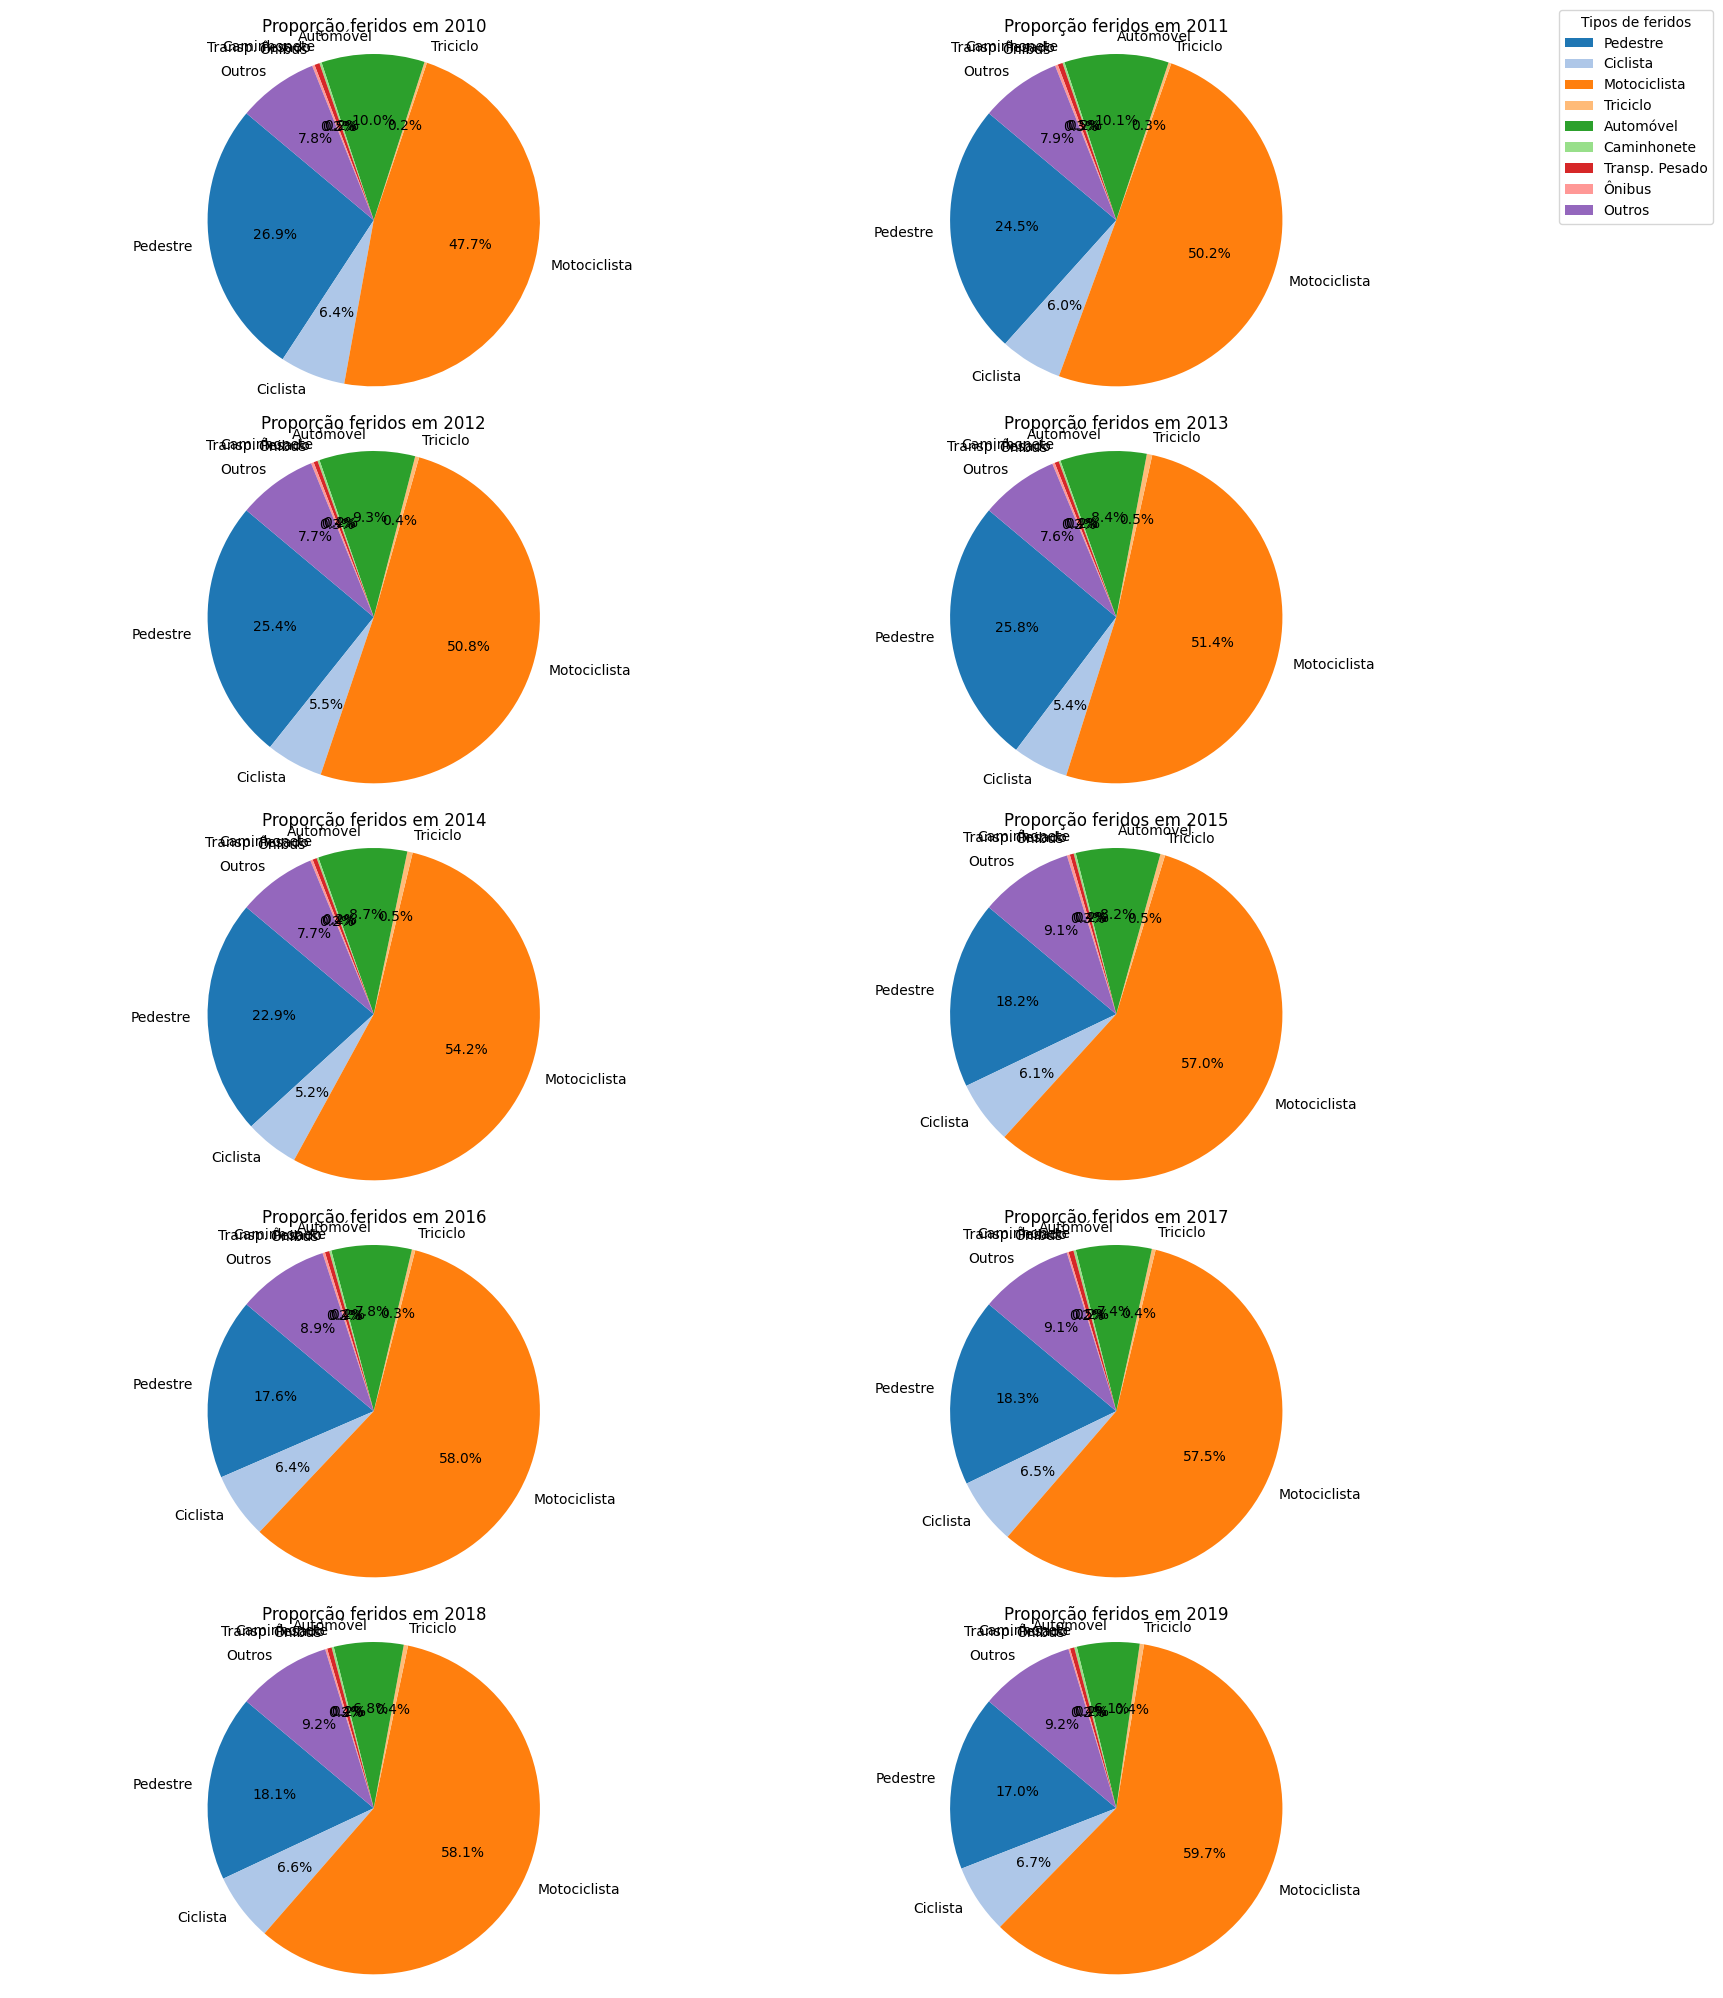

In [ ]:
feridos_tipo_abreviadas = {
    'Pedestre_feridos': 'Pedestre',
    'Ciclista_feridos': 'Ciclista',
    'Motociclista_feridos': 'Motociclista',
    'Ocup_triciclo_motor_feridos': 'Triciclo',
    'Ocup_automovel_feridos': 'Automóvel',
    'Ocup_caminhonete_feridos': 'Caminhonete',
    'Ocup_veic_transp_pesado_feridos': 'Transp. Pesado',
    'Ocup_onibus_feridos': 'Ônibus',
    'Outros_feridos': 'Outros'
}
# Criando um grid de gráficos
fig, axs = plt.subplots(nrows=len(df_acidentes['ano'].unique())//2 + len(df_acidentes['ano'].unique())%2, ncols=2, figsize=(15, 20))
axs = axs.flatten()

for i, ano in enumerate(df_acidentes['ano'].unique()):
    somas_feridos = df_acidentes[df_acidentes['ano'] == ano][['Pedestre_feridos','Ciclista_feridos', 'Motociclista_feridos', 'Ocup_triciclo_motor_feridos','Ocup_automovel_feridos', 'Ocup_caminhonete_feridos',
                    'Ocup_veic_transp_pesado_feridos', 'Ocup_onibus_feridos', 'Outros_feridos',]].sum()

    labels_abreviados = [feridos_tipo_abreviadas[col] for col in somas_feridos.index]


    axs[i].pie(somas_feridos, labels=labels_abreviados, colors=plt.get_cmap('tab20').colors, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Proporção feridos em {ano}')
    axs[i].axis('equal')  # Assegura que o gráfico de pizza seja desenhado como um círculo

fig.legend(labels_abreviados, loc='upper right', bbox_to_anchor=(1.15, 1), title="Tipos de feridos")

# Removendo gráficos vazios (caso o número de anos seja ímpar)
if len(df_acidentes['ano'].unique()) % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

### População por Município

In [ ]:
df_populacao_munic = df_acidentes[['ano','uf_REGIAO', 'Populacao', 'uf_SIGLA_UF', 'Município']].groupby(['ano','uf_REGIAO', 'uf_SIGLA_UF', 'Município']).max().reset_index()
df_populacao_munic

,ano,uf_REGIAO,uf_SIGLA_UF,Município,Populacao
0,2010,Centro-Oeste,DF,Brasília,2570160
1,2010,Centro-Oeste,GO,Abadia de Goiás,6876
2,2010,Centro-Oeste,GO,Abadiânia,15757
3,2010,Centro-Oeste,GO,Acreúna,20279
4,2010,Centro-Oeste,GO,Adelândia,2477
...,...,...,...,...,...
55695,2019,Sul,SC,Zortéa,3363
55696,2019,Sul,SC,Água Doce,7145
55697,2019,Sul,SC,Águas Frias,2366
55698,2019,Sul,SC,Águas Mornas,6469


### Mortos e feridos em % por região

In [ ]:
df_populacao_regiao = df_populacao_munic.groupby(['ano', 'uf_REGIAO'])['Populacao'].sum().reset_index()
df_populacao_regiao.head()

,ano,uf_REGIAO,Populacao
0,2010,Centro-Oeste,14058094
1,2010,Nordeste,53081950
2,2010,Norte,15864454
3,2010,Sudeste,80364410
4,2010,Sul,27386891


In [ ]:
df_mortes_feridos_regiao = df_acidentes.groupby(['ano', 'uf_REGIAO'])[['total_mortes', 'total_feridos']].sum().reset_index()
df_mortes_feridos_regiao = pd.merge(df_mortes_feridos_regiao, df_populacao_regiao, on=['ano', 'uf_REGIAO'])
df_mortes_feridos_regiao.head()

,ano,uf_REGIAO,total_mortes,total_feridos,Populacao
0,2010,Centro-Oeste,4479.0,14197.0,14058094
1,2010,Nordeste,11885.0,39794.0,53081950
2,2010,Norte,3370.0,8249.0,15864454
3,2010,Sudeste,15571.0,65752.0,80364410
4,2010,Sul,7535.0,18074.0,27386891


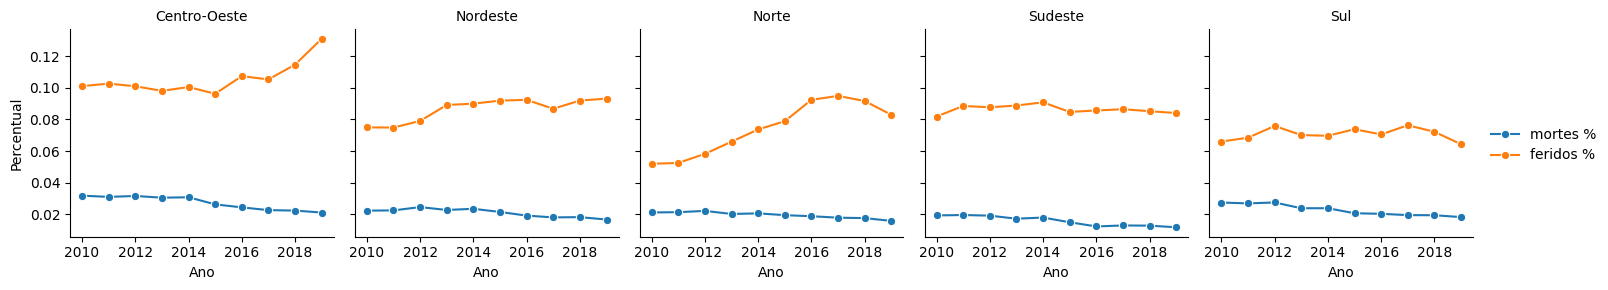

In [ ]:
# Mesclando os dataframes para cálculo dos %
# df_mortes_feridos_regiao = pd.merge(df_mortes_feridos_regiao, df_populacao_regiao, on=['ano', 'uf_REGIAO'])
df_mortes_feridos_regiao['mortes %'] = (df_mortes_feridos_regiao['total_mortes'] / df_mortes_feridos_regiao['Populacao']) * 100
df_mortes_feridos_regiao['feridos %'] = (df_mortes_feridos_regiao['total_feridos'] / df_mortes_feridos_regiao['Populacao']) * 100

g = sns.FacetGrid(\
    #mortes e feridos vira valor em uma coluna
    pd.melt(df_mortes_feridos_regiao, id_vars=['ano', 'uf_REGIAO'], value_vars=['mortes %', 'feridos %'], var_name='Tipo_acidente', value_name='Percentual')\
    , col='uf_REGIAO')

g.map_dataframe(sns.lineplot, x='ano', y='Percentual', hue='Tipo_acidente', marker='o')
g.set_axis_labels("Ano", "Percentual")
g.add_legend()
g.set_titles("{col_name}")
plt.show()


### Top 5 municipios com mais mortos

,ano,Município,total_mortes,Ranking
0,2019,São Paulo,762.0,1
1,2019,Recife,414.0,2
2,2019,Rio de Janeiro,385.0,3
3,2019,Goiânia,361.0,4
4,2019,Brasília,338.0,5
5,2018,Rio de Janeiro,628.0,1
6,2018,Goiânia,398.0,2


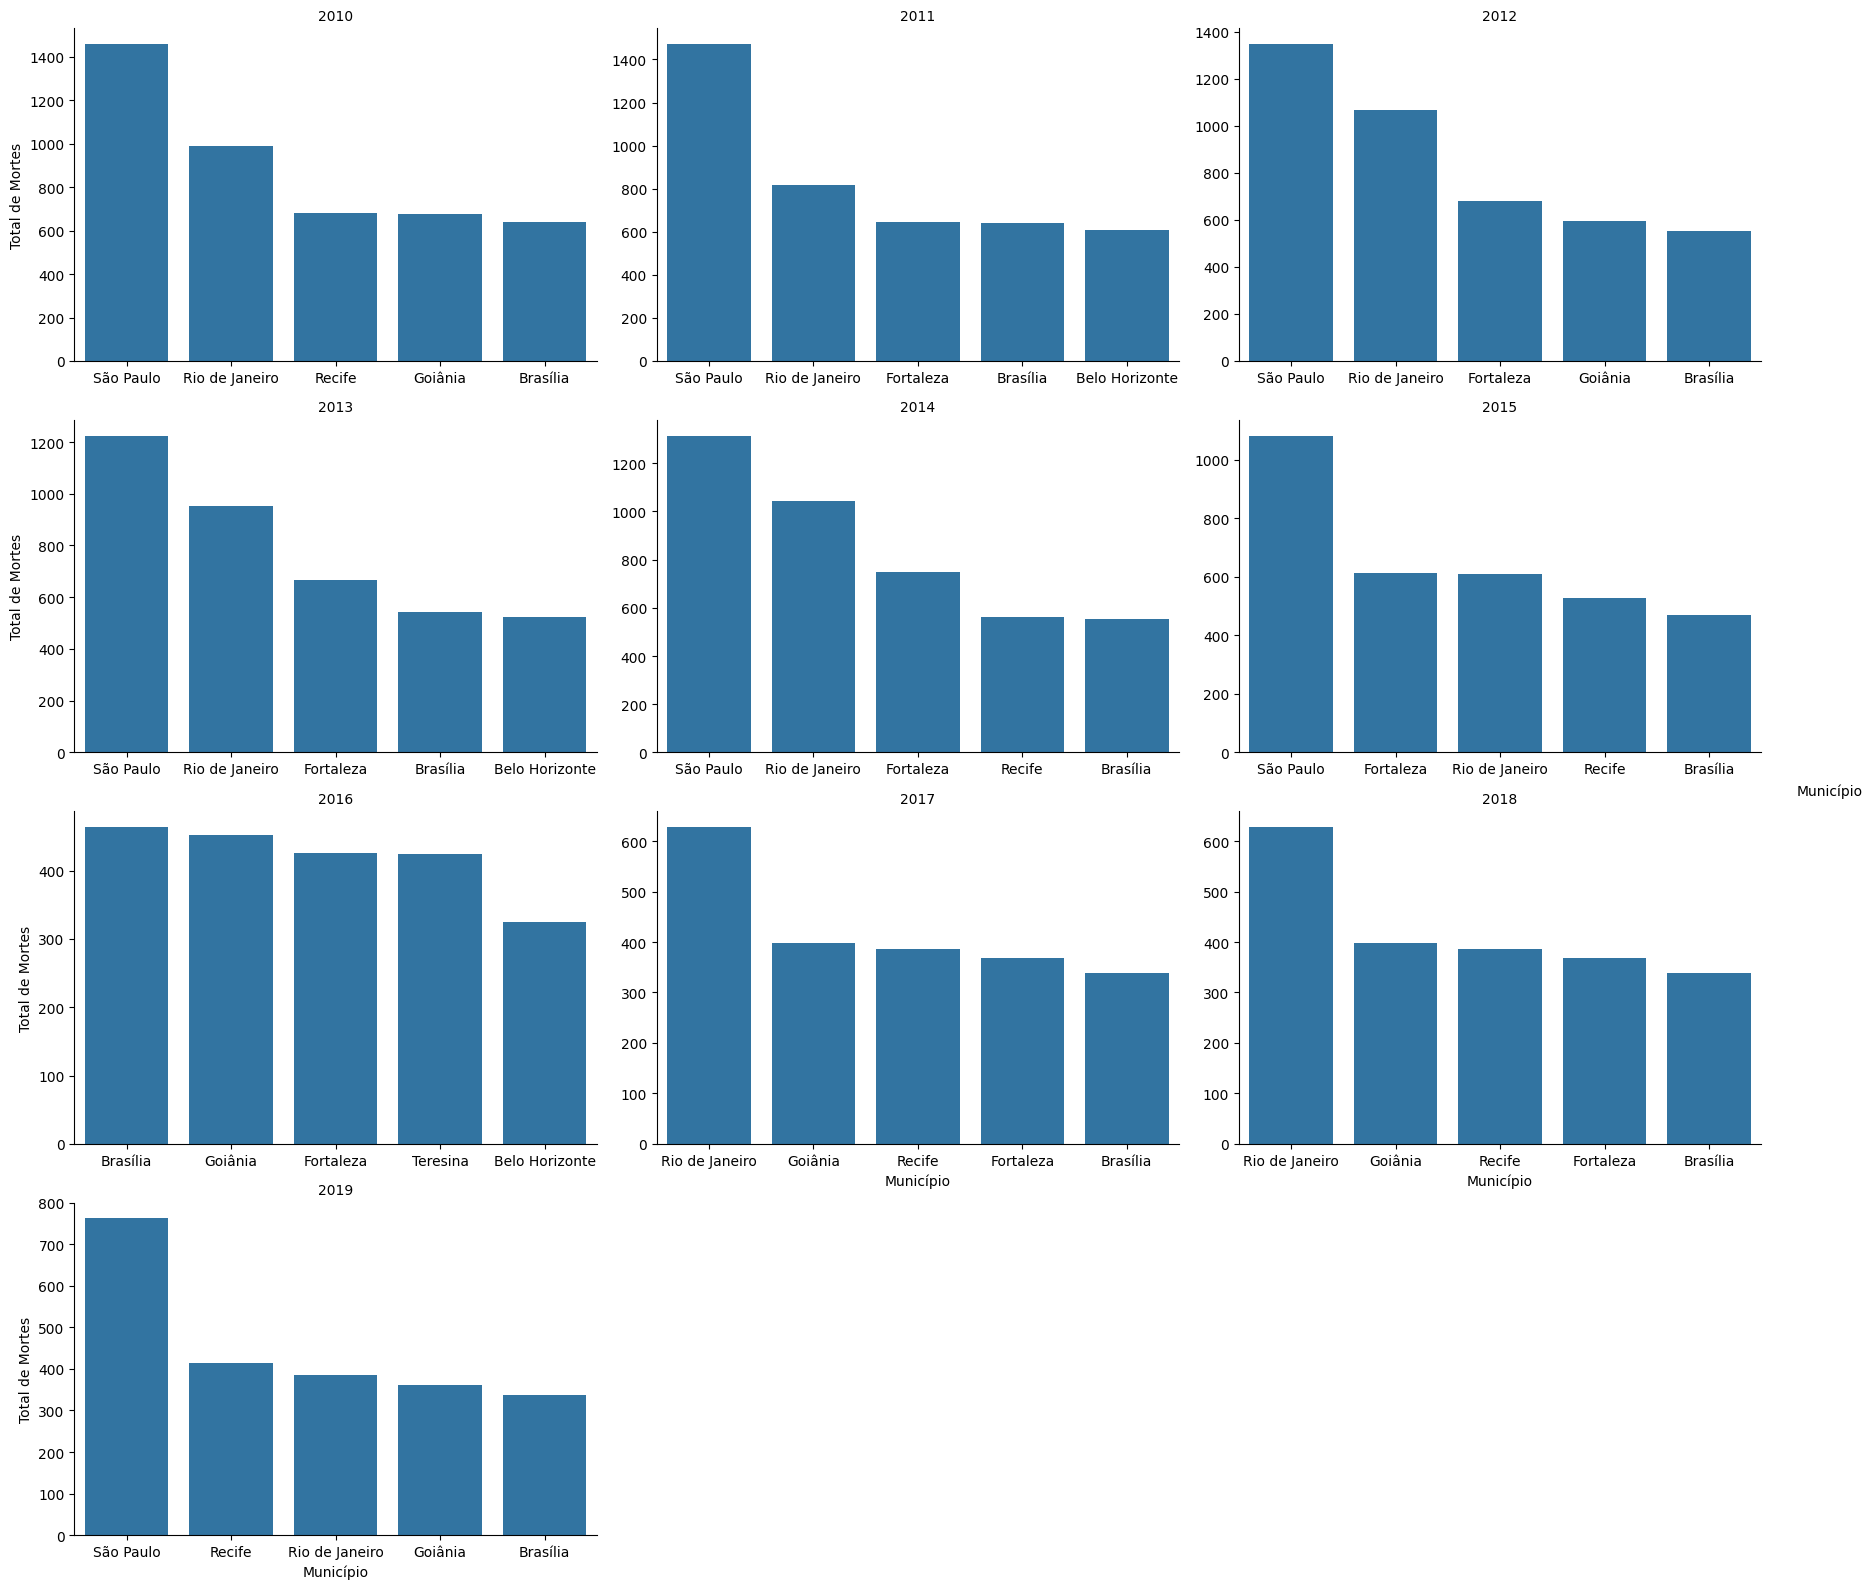

In [ ]:
df_mortes_munic = df_acidentes[['ano','Município','total_mortes']].sort_values(by=['ano', 'total_mortes'], ascending=[False, False]).groupby('ano').head().reset_index(drop=True)
df_mortes_munic['Ranking'] = df_mortes_munic.groupby('ano')['total_mortes'].rank(method='first', ascending=False).astype(int)
display(df_mortes_munic.head(7))

g = sns.FacetGrid(df_mortes_munic, col='ano', col_wrap=3, height=4, aspect=1.5, sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x='Município', y='total_mortes')
g.set_axis_labels("Município", "Total de Mortes")
g.add_legend(title='Município')
g.set_titles("{col_name}")
g.tight_layout()
plt.show()


### Top 5 municipios com mais feridos

,ano,Município,total_feridos,Ranking
0,2019,São Paulo,9126.0,1
1,2019,Fortaleza,7596.0,2
2,2019,Goiânia,7436.0,3
3,2019,Belo Horizonte,6161.0,4
4,2019,Teresina,5111.0,5
5,2018,São Paulo,8686.0,1
6,2018,Fortaleza,6905.0,2


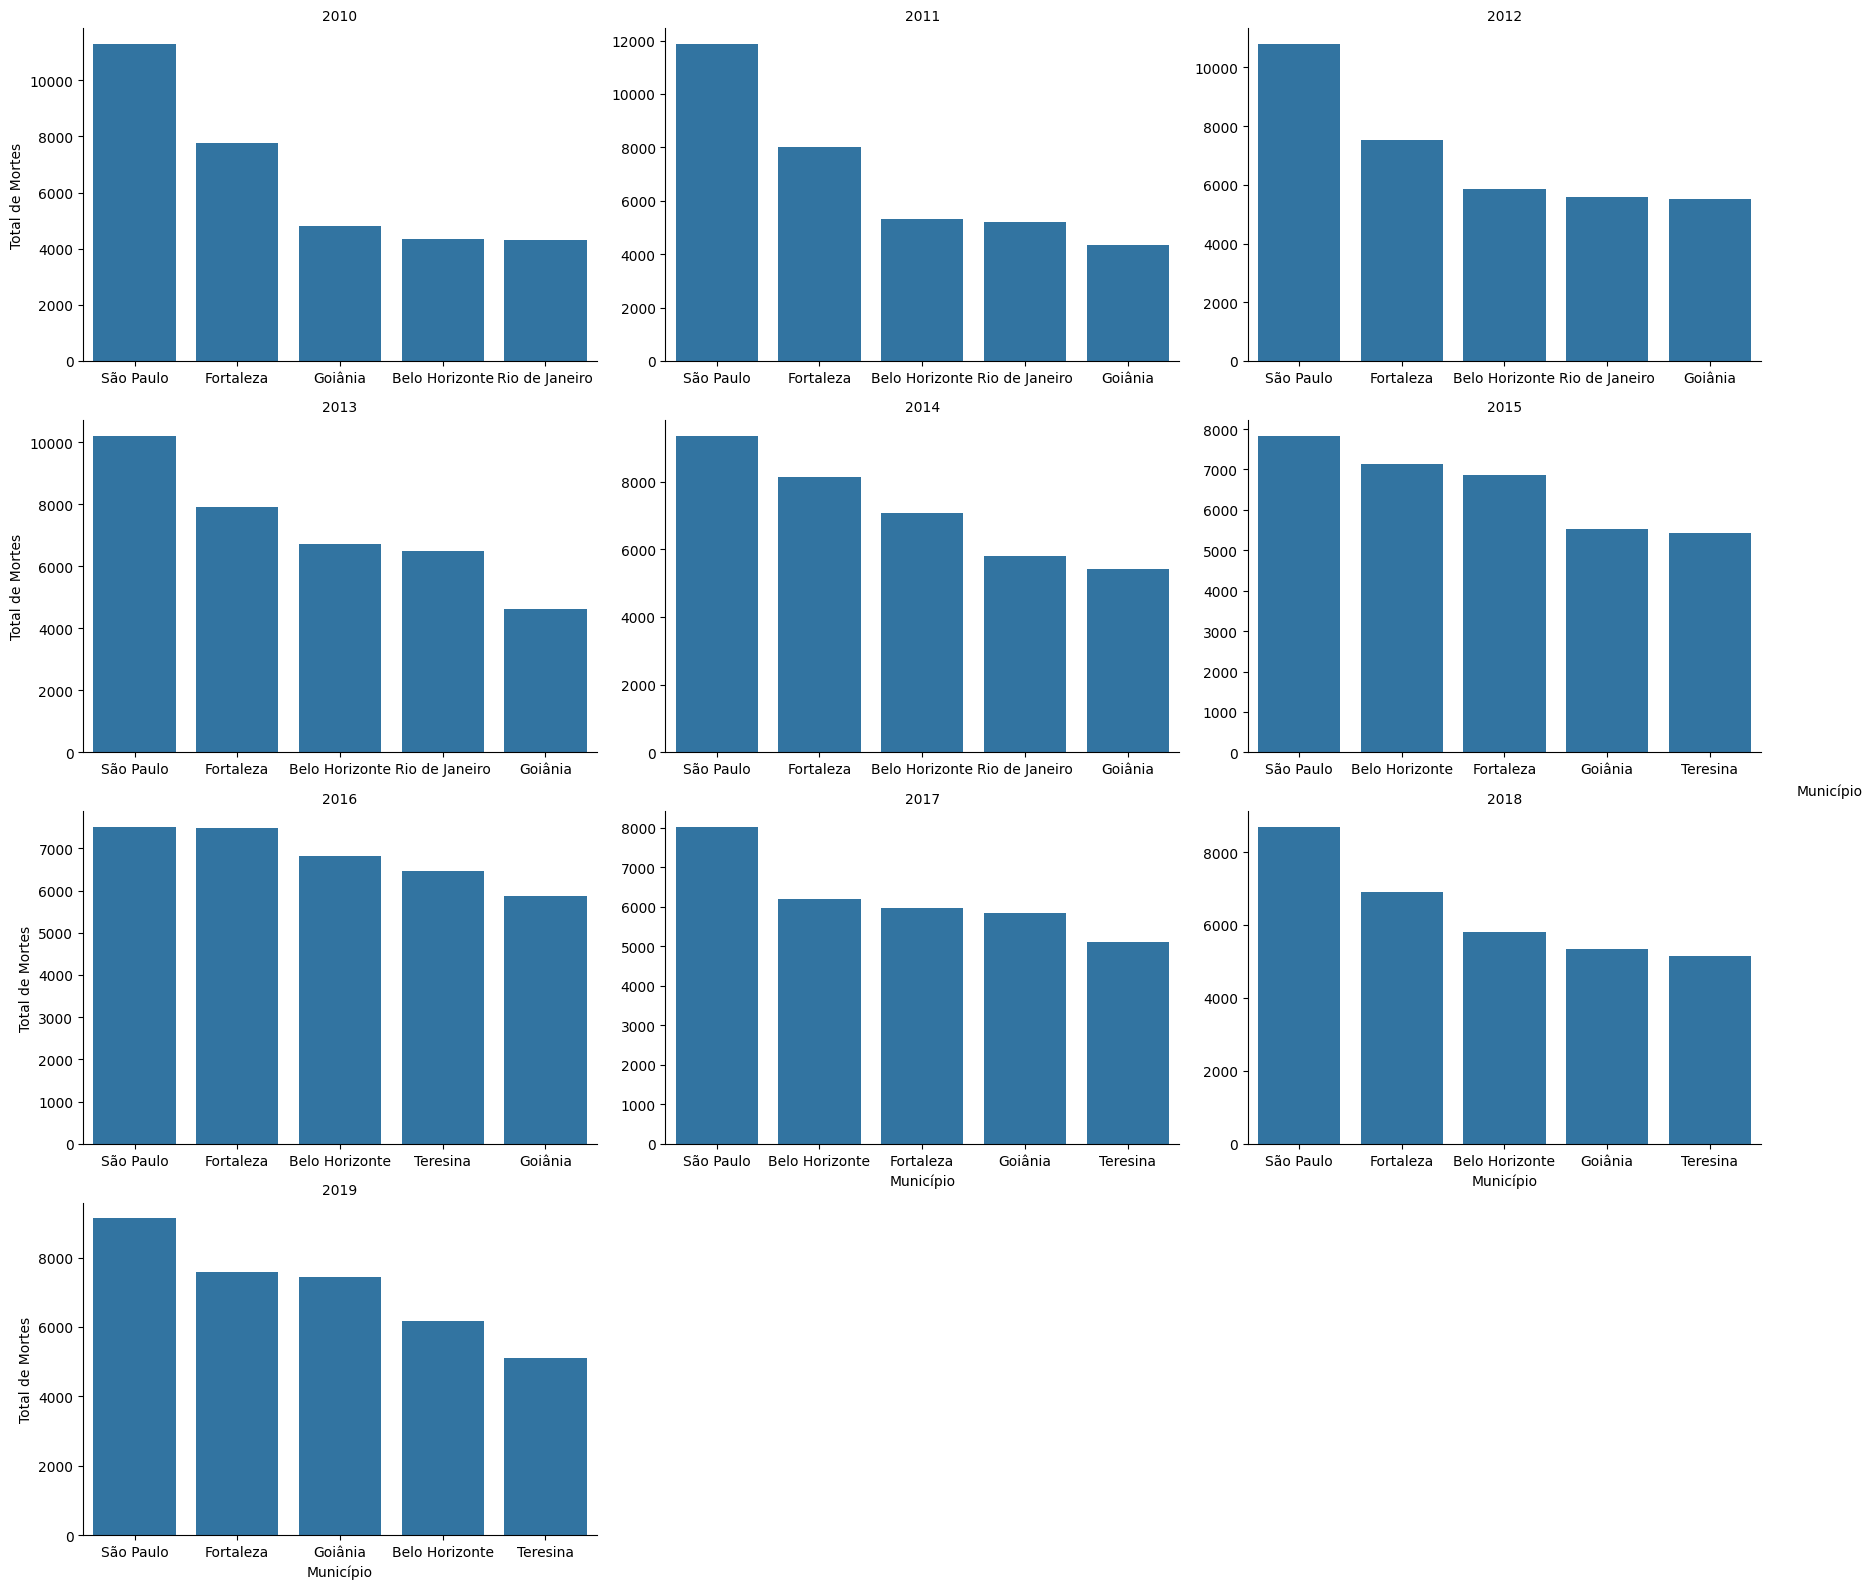

In [ ]:
df_feridos_munic = df_acidentes[['ano','Município','total_feridos']].sort_values(by=['ano', 'total_feridos'], ascending=[False, False]).groupby('ano').head().reset_index(drop=True)
df_feridos_munic['Ranking'] = df_feridos_munic.groupby('ano')['total_feridos'].rank(method='first', ascending=False).astype(int)
display(df_feridos_munic.head(7))

g = sns.FacetGrid(df_feridos_munic, col='ano', col_wrap=3, height=4, aspect=1.5, sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x='Município', y='total_feridos')
g.set_axis_labels("Município", "Total de Mortes")
g.add_legend(title='Município')
g.set_titles("{col_name}")
g.tight_layout()
plt.show()


In [ ]:
df_acidentes[['Populacao', *df_acidentes.columns]]

,Populacao,Código IBGE,ano,Região,Município,Pedestre_mortes,Ciclista_mortes,Motociclista_mortes,Ocup_triciclo_motor_mortes,Ocup_automovel_mortes,...,Outros_feridos,total_feridos,taxa_mun_feridos,taxa_mun_pedestre_feridos,taxa_mun_ciclista_feridos,taxa_mun_motociclista_feridos,taxa_mun_automovel_feridos,taxa_mun_veiculo_pesado_feridos,taxa_mun_onibus_feridos,taxa_mun_outros_feridos
0,24392,1100015,2010,N,Alta Floresta D'Oeste,2,0,5,0,0,...,0,13.0,53.296200,0.000000,0.000000,53.296200,0.000000,0.000000,0.000000,0.000000
1,90353,1100023,2010,N,Ariquemes,0,1,2,0,0,...,3,43.0,47.591100,0.000000,1.106800,40.950500,2.213500,0.000000,0.000000,3.320300
2,6313,1100031,2010,N,Cabixi,0,0,0,0,0,...,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,78574,1100049,2010,N,Cacoal,2,1,17,0,4,...,1,57.0,72.543100,63.634300,1.272700,6.363400,0.000000,0.000000,0.000000,1.272700
4,17029,1100056,2010,N,Cerejeiras,3,0,1,0,0,...,0,1.0,5.872300,0.000000,5.872300,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55695,13863,5222005,2019,CO,Vianópolis,1,0,1,0,0,...,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
55696,8743,5222054,2019,CO,Vicentinópolis,0,0,0,0,2,...,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
55697,6171,5222203,2019,CO,Vila Boa,0,0,1,0,6,...,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
55698,5821,5222302,2019,CO,Vila Propício,0,0,0,0,1,...,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_acidentes[['ano','uf_REGIAO', 'Populacao', 'uf_SIGLA_UF', 'Município']].sort_values(by='Município')#.groupby(['uf_REGIAO', 'uf_SIGLA_UF', 'Município']).sum().reset_index()

,ano,uf_REGIAO,Populacao,uf_SIGLA_UF,Município
55453,2019,Centro-Oeste,8773,GO,Abadia de Goiás
16463,2012,Centro-Oeste,7164,GO,Abadia de Goiás
38743,2016,Centro-Oeste,8053,GO,Abadia de Goiás
22033,2013,Centro-Oeste,7567,GO,Abadia de Goiás
5323,2010,Centro-Oeste,6876,GO,Abadia de Goiás
...,...,...,...,...,...
3648,2010,Sudeste,2673,SP,Óleo
48208,2018,Sudeste,2522,SP,Óleo
25928,2014,Sudeste,2652,SP,Óleo
37068,2016,Sudeste,2605,SP,Óleo


## Base Empreendimentos

In [ ]:
df_populacao_munic2 = df_empreend[['ano','uf_REGIAO', 'Populacao', 'uf_SIGLA_UF', 'Município']].groupby(['ano','uf_REGIAO', 'uf_SIGLA_UF', 'Município']).max().reset_index()
df_populacao_munic2

,ano,uf_REGIAO,uf_SIGLA_UF,Município,Populacao
0,1996.0,Centro-Oeste,MS,Angélica,8215.0
1,1996.0,Centro-Oeste,MS,Aquidauana,40394.0
2,1996.0,Centro-Oeste,MS,Brasilândia,10595.0
3,1996.0,Centro-Oeste,MS,Campo Grande,600069.0
4,1996.0,Centro-Oeste,MS,Coronel Sapucaia,14308.0
...,...,...,...,...,...
20221,2021.0,Nordeste,PI,Paulistana,20583.0
20222,2021.0,Nordeste,PI,Queimada Nova,9041.0
20223,2021.0,Sudeste,MG,Vespasiano,131849.0
20224,2021.0,Sudeste,SP,Itu,177150.0


### Quantidades por tipos de programas ao longo dos anos

In [ ]:
print('programas:',df_empreend.programa.unique())

df_empreend.pivot_table(index='ano', columns='programa', aggfunc='size', fill_value=0)

programas: ['PAC FIN' 'PAC OGU' 'AVANÇAR PÚBLICO' 'EMENDAS' 'PRÓ COMUNIDADE'
 'SETOR PRIVADO' nan]


programa,AVANÇAR PÚBLICO,EMENDAS,PAC FIN,PAC OGU,PRÓ COMUNIDADE,SETOR PRIVADO
ano,,,,,,
1996.0,0,70,0,0,0,0
1997.0,0,389,0,0,0,0
1998.0,0,776,0,0,0,0
1999.0,0,470,0,0,0,0
2000.0,0,481,0,0,4,0
2001.0,0,1200,0,0,1,0
2002.0,0,1899,0,0,1,0
2003.0,0,775,0,0,0,0
2004.0,0,855,0,0,0,0


### Valor de investimento por Estado

In [ ]:
df_agrupado_estado = df_empreend.groupby(['ano','uf_SIGLA_UF'])['vlr_investimento'].sum().sort_values(ascending=False).reset_index()
df_agrupado_estado

,ano,uf_SIGLA_UF,vlr_investimento
0,2014.0,SP,2.153194e+10
1,2012.0,SP,4.905003e+09
2,2013.0,BA,4.671763e+09
3,2013.0,SP,4.083182e+09
4,2013.0,RJ,3.008309e+09
...,...,...,...
699,1996.0,SP,1.379700e+05
700,1996.0,SC,1.314280e+05
701,1999.0,CE,1.275840e+05
702,1997.0,AC,1.101628e+05


,vlr_investimento
ano,
1996,0.137970
1997,4.392103
1998,7.467830
1999,4.565027
2000,6.022925
2001,25.528002
2002,37.457117
2003,22.031468
2004,96.550867


Text(0.5, 1.0, 'Investimento em SP em milhões de Reais')

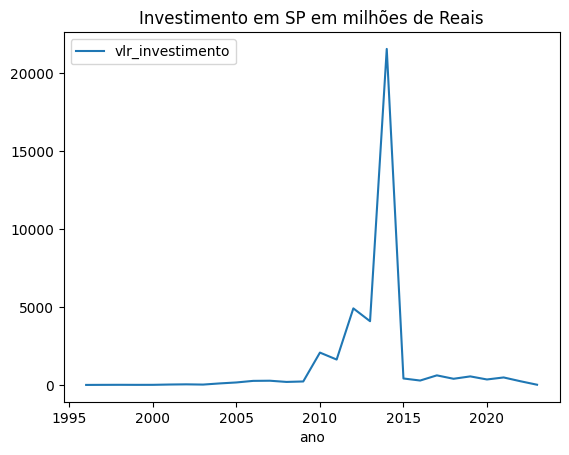

In [ ]:
df_investimento_SP = df_agrupado_estado[df_agrupado_estado['uf_SIGLA_UF'] == 'SP'][['ano','vlr_investimento']].sort_values('ano').reset_index(drop=True)
df_investimento_SP['ano'] = df_investimento_SP['ano'].astype(int)
df_investimento_SP.set_index('ano', inplace=True)
df_investimento_SP = df_investimento_SP / 1e6
display(df_investimento_SP)
(df_investimento_SP).plot().set_title("Investimento em SP em milhões de Reais")


In [ ]:
df_investimento_not_SP = df_agrupado_estado[['uf_SIGLA_UF','ano','vlr_investimento']].sort_values(['ano', 'uf_SIGLA_UF']).reset_index(drop=True)
df_investimento_not_SP['ano'] = df_investimento_not_SP['ano'].astype(int)
df_investimento_not_SP


,uf_SIGLA_UF,ano,vlr_investimento
0,AC,1996,2994708.06
1,AL,1996,890000.00
2,MG,1996,4631645.82
3,MS,1996,2994794.50
4,PA,1996,1563193.40
...,...,...,...
699,RJ,2023,1000000.00
700,RN,2023,1057858.00
701,SC,2023,3353000.00
702,SP,2023,12608245.49


### Duração das Obras

<Axes: xlabel='Duracao_obra', ylabel='Count'>

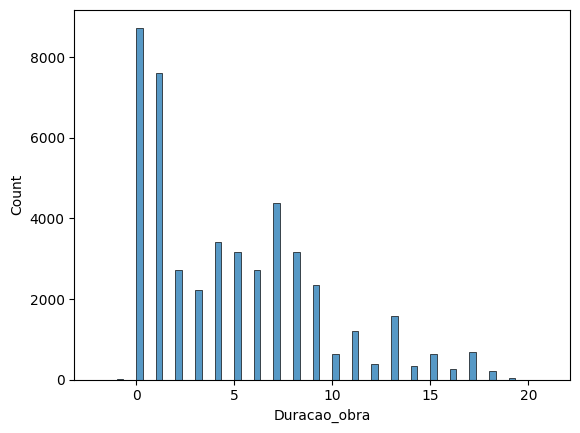

In [ ]:
df_empreend['Duracao_obra'] = (df_empreend['ano_fim_obra'] -	df_empreend['ano_inicio_obra'])
sns.histplot(df_empreend['Duracao_obra'])

### Origem da obra

In [ ]:
df_empreend.origem.unique()

array(['PAC_MCID', 'NPAC_DBGESTORES', 'NPAC_FGTS'], dtype=object)

origem
NPAC_DBGESTORES    69038
PAC_MCID            2080
NPAC_FGTS            130
Name: count, dtype: int64

origem
NPAC_DBGESTORES    96.898159
PAC_MCID            2.919380
NPAC_FGTS           0.182461
Name: count, dtype: float64

<Axes: xlabel='origem'>

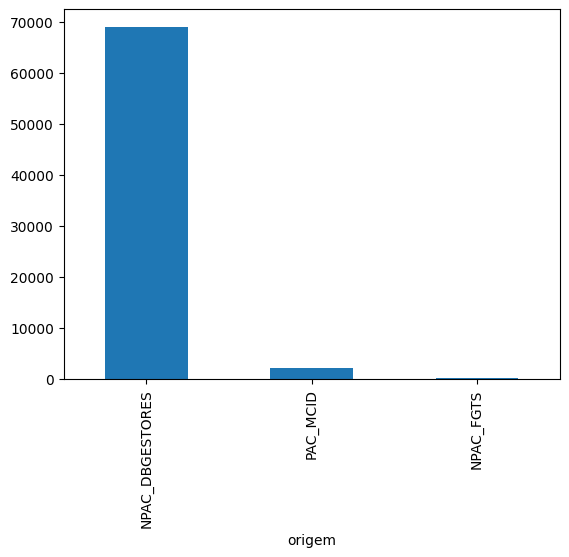

In [ ]:
display(df_empreend.origem.value_counts())
display(df_empreend.origem.value_counts() / len(df_empreend.origem) * 100)
df_empreend.origem.value_counts().plot(kind='bar')

### Empreendimentos

In [ ]:
# pd.DataFrame(df_empreend.empreendimento.unique())
df_empreend.empreendimento.unique().tolist()[:40]

["IMPLANTACAO DO TRANSPORTE RAPIDO POR ONIBUS NO CORREDOR DA  'V CAXANGA ATE O TERMINAL DE CAMARAGIBE",
 'CONSTRUCAO DO TERMINAL DE COSME E DAMIAO',
 'IMPLANTA«ŸO DO TRANSPORTE RAPIDO POR ONIBUS NO CORREDOR     NORTE SUL NO TRECHO IGARASSU/JOANA BEZERRA/CENTRO DO RECIFE',
 'NAN',
 'PAVIMENTACAO E QUALIFICACAO DE VIAS URBANAS, COM INSERCAO DEDRENAGEM, GUIAS E SARJ. E CALCAMENTOS NO VERDE PARQUE',
 'PAVIMENTACAO E QUALIFICACAO DE VIAS URBANAS COM DRENAGEM,   GUIAS, SARJETAS E CALCAMENTO NO JARDIM DAS OLIVEIRAS',
 'PAVIMENTACAO ASFALTICA EM DIVERSAS RUAS E BAIRROS DA CIDADE',
 'PRO. TRANSPORTE - PAVIMENTACAO - SAO JOSE - LOT. BENJAMIN   PZO.1ŒDESEMBOLSO: JAN/2013 - PZO.ULTIMO DESEMBOLSO: MAR/2016',
 'SIM - SISTEMA INTEGRADO DE MONITORAMENTO.CONJUNTO DE INTER  VENCOES PARA CONTROLE DE TRAFEGO EM AREA',
 'IMPLANTACO DO CORREDOR AVENIDA TRONCO/CRUZEIRO DO SUL',
 'IMPLANTACAO DO CORREDOR PADRE CACIQUE/AVENIDA BEIRA RIO     (AV. EDVALDO PEREIRA PAIVA)',
 'PRO. TRANSPORTE - PAV. - NAVEGANTES I 

In [ ]:
#empreendimento q estão duplicados
df_empreend[df_empreend[['ano','empreendimento','Código IBGE']].duplicated()].empreendimento.unique().shape

(2226,)

In [ ]:
df_empreend.cod_operacao#.unique().shape

0        319910.0
1        319912.0
2        319914.0
3        354485.0
4        345051.0
           ...   
71243    603795.0
71244    603796.0
71245    603794.0
71246    603798.0
71247    603847.0
Name: cod_operacao, Length: 71248, dtype: float64

In [ ]:
##codigo para agrupar nomes parecidos de empreendimentos
# from fuzzywuzzy import fuzz
# from fuzzywuzzy import process

# def agrupar_nomes(nomes, threshold=80):
#     agrupados = {}
#     for nome in nomes:
#         encontrado = False
#         for chave in agrupados.keys():
#             if fuzz.token_sort_ratio(nome, chave) > threshold:
#                 agrupados[chave].append(nome)
#                 encontrado = True
#                 break
#         if not encontrado:
#             agrupados[nome] = [nome]
#     return agrupados

# agrupados = agrupar_nomes(df_empreend.empreendimento.unique())

# for chave, grupo in agrupados.items():
#     print(f"Grupo: {chave}")
#     for nome in grupo:
#         print(f"  {nome}")

# agrupados_df = pd.DataFrame([(chave, nome) for chave, grupo in agrupados.items() for nome in grupo], columns=['Grupo', 'Nome'])
# agrupados_df

## Combinando bases empreendimentos com acidentes

In [ ]:
#colunas em comum
colunas_comum = list(set(df_acidentes.columns).intersection(set(df_empreend.columns)))
print(colunas_comum)
# df_empreend['Código IBGE']

['mun_AMAZONIA', 'mun_codigo_adotado', 'uf_CODIGO_UF', 'mun_CAPITAL', 'uf_REGIAO', 'mun_AREA', 'mun_coordenadas', 'Município', 'uf_NOME_UF', 'mun_LONGITUDE', 'mun_LATITUDE', 'mun_MUNNOME', 'ano', 'uf_SIGLA_UF', 'Populacao', 'mun_ALTITUDE', 'Região', 'mun_MUNNOMEX', 'mun_FRONTEIRA', 'Código IBGE']


In [ ]:
print('tamanhos',len(df_acidentes), len(df_empreend))
df_merged = df_acidentes.merge(df_empreend, how='right', on=colunas_comum)
df_merged


tamanhos 55700 71248


,Código IBGE,ano,Região,Município,Pedestre_mortes,Ciclista_mortes,Motociclista_mortes,Ocup_triciclo_motor_mortes,Ocup_automovel_mortes,Ocup_caminhonete_mortes,...,vlr_ult_desembolso_num,vlr_ult_repasse_desbloqueado_num,vlr_ult_contrapartida_desbloqueado_num,vlr_ult_investimento_desbloqueado_num,ano_assinatura,ano_inicio_obra,ano_fim_obra,ano_ult_desembolso,ano_ult_desbloqueio,ano_ult_ref_bm
0,2611606.0,2011.0,NE,Recife,NaN,NaN,NaN,NaN,NaN,NaN,...,R$ 305.9 mil,R$ 0,R$ 0,R$ 0,2011.0,2011.0,2021.0,2019.0,2019.0,NaN
1,2611606.0,2011.0,NE,Recife,NaN,NaN,NaN,NaN,NaN,NaN,...,R$ 5.8 milhões,R$ 0,R$ 0,R$ 0,2011.0,2011.0,2015.0,2014.0,2014.0,NaN
2,2611606.0,2011.0,NE,Recife,NaN,NaN,NaN,NaN,NaN,NaN,...,R$ 910.6 mil,R$ 0,R$ 0,R$ 0,2011.0,2011.0,2022.0,2022.0,2022.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,R$ 0,R$ 0,R$ 0,NaN,NaN,NaN,NaN,NaN,NaN
4,3502804.0,2012.0,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R$ 140.3 mil,R$ 0,R$ 0,R$ 0,2012.0,2012.0,2018.0,2015.0,2015.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71243,2927408.0,2021.0,NE,Salvador,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,R$ 0,R$ 0,R$ 0,2021.0,2021.0,2022.0,NaN,NaN,NaN
71244,2927408.0,2021.0,NE,Salvador,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,R$ 0,R$ 0,R$ 0,2021.0,2021.0,2022.0,NaN,NaN,NaN
71245,2927408.0,2021.0,NE,Salvador,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,R$ 0,R$ 0,R$ 0,2021.0,2021.0,2022.0,NaN,NaN,NaN
71246,2927408.0,2021.0,NE,Salvador,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,R$ 0,R$ 0,R$ 0,2021.0,2021.0,2022.0,NaN,NaN,NaN
